# Assemble Boston dataframe

In [2]:
import pandas as pd
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read in the data
datafiles = glob.glob('../Data/Boston/hubway_trips.csv')
datafiles

['../Data/Boston/hubway_trips.csv']

In [121]:
df = pd.read_csv('../Data/Boston/hubway_trips_datetime.csv')

In [122]:
df.columns

Index([u'Unnamed: 0', u'seq_id', u'hubway_id', u'status', u'duration',
       u'start_date', u'stationid', u'end_date', u'end_statn', u'bike_nr',
       u'subsc_type', u'zip_code', u'birth_date', u'gender', u'start_day',
       u'nrides'],
      dtype='object')

###### Add features for number of rides per station.  Appoximate number of stations as number of unique start stations.

In [123]:
databydaygroup = df.groupby(["stationid", "start_day"], as_index=False)

In [124]:
databyday = databydaygroup.agg({"nrides": lambda x: x.sum(), "duration": lambda x: np.median(x)})

In [125]:
temp = databyday['start_day']

In [126]:
t1 = pd.DatetimeIndex(temp)

In [127]:
databyday['dayofweek'] = t1.dayofweek

In [128]:
databyday = databyday[databyday['dayofweek'] < 5]

In [129]:
databyday['ndays'] = np.ones(len(databyday))

In [130]:
databystation = databyday.groupby('stationid', as_index=False).agg({'nrides': lambda x: x.sum(), 'ndays': lambda x: x.sum(), 'duration': lambda x: np.median(x)})

In [131]:
databystation

,stationid,duration,nrides,ndays
0,3,660.00,7653,442
1,4,538.00,12573,419
2,5,541.00,7718,419
3,6,600.00,17133,435
4,7,600.00,7028,403
5,8,912.00,5274,439
6,9,720.00,12393,422
7,10,600.50,12190,420
8,11,675.00,10544,444
9,12,559.00,8300,445


###### Add feature for origin and destination density

In [132]:
station = pd.read_csv('../Data/Boston/StationGroup2.csv')
station = station.rename(columns = {'id': 'stationid'})

In [133]:
station

,Unnamed: 0,stationid,terminal,station,municipal,lat,lng,status,originpop,originwork,originsubway,destpop,destwork,destsubway
0,0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing,130012.147272,171462.091932,5983.553086,601148.616046,1005202.928000,60598.207749
1,1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing,121321.874735,269727.082761,13801.134297,984236.947561,1747213.154600,100287.611125
2,2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing,138675.634712,218971.853238,12123.716374,757016.768986,1347828.712930,78405.994583
3,3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing,93879.649000,282357.974491,30573.424838,1099471.663230,1943149.994620,137806.371045
4,4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing,62128.582050,208839.426275,4747.836723,775737.168523,1271820.166630,85539.806149
5,5,8,A32001,Union Square - Brighton Ave. at Cambridge St.,Boston,42.353334,-71.137313,Existing,94517.477443,57834.779189,2921.597170,338922.372500,357987.698659,16274.261803
6,6,9,A32002,Agganis Arena - 925 Comm Ave.,Boston,42.351313,-71.116174,Existing,121256.180376,130142.250684,4674.694497,508904.801435,710815.841194,50200.926265
7,7,10,A32003,B.U. Central - 725 Comm. Ave.,Boston,42.350075,-71.105884,Existing,132393.964708,180897.011163,8216.410782,626840.716577,985017.456681,69073.362761
8,8,11,A32004,Longwood Ave / Binney St,Boston,42.338629,-71.106500,Existing,120537.636411,140306.470025,5648.411253,514678.781363,810032.288873,49250.453228
9,9,12,B32002,Ruggles Station / Columbus Ave.,Boston,42.335911,-71.088496,Existing,132431.492854,176305.922766,14380.360366,659575.930261,1210663.201770,68052.817222


In [134]:
databystation = databystation.merge(station, on='stationid')
databystation = databystation.drop(['terminal', 'station', 'status', 'municipal'], axis=1)

In [135]:
databystation = databystation.drop('Unnamed: 0', axis=1)

In [136]:
databystation

,stationid,duration,nrides,ndays,lat,lng,originpop,originwork,originsubway,destpop,destwork,destsubway
0,3,660.00,7653,442,42.340021,-71.100812,130012.147272,171462.091932,5983.553086,601148.616046,1005202.928000,60598.207749
1,4,538.00,12573,419,42.345392,-71.069616,121321.874735,269727.082761,13801.134297,984236.947561,1747213.154600,100287.611125
2,5,541.00,7718,419,42.341814,-71.090179,138675.634712,218971.853238,12123.716374,757016.768986,1347828.712930,78405.994583
3,6,600.00,17133,435,42.361285,-71.065140,93879.649000,282357.974491,30573.424838,1099471.663230,1943149.994620,137806.371045
4,7,600.00,7028,403,42.353412,-71.044624,62128.582050,208839.426275,4747.836723,775737.168523,1271820.166630,85539.806149
5,8,912.00,5274,439,42.353334,-71.137313,94517.477443,57834.779189,2921.597170,338922.372500,357987.698659,16274.261803
6,9,720.00,12393,422,42.351313,-71.116174,121256.180376,130142.250684,4674.694497,508904.801435,710815.841194,50200.926265
7,10,600.50,12190,420,42.350075,-71.105884,132393.964708,180897.011163,8216.410782,626840.716577,985017.456681,69073.362761
8,11,675.00,10544,444,42.338629,-71.106500,120537.636411,140306.470025,5648.411253,514678.781363,810032.288873,49250.453228
9,12,559.00,8300,445,42.335911,-71.088496,132431.492854,176305.922766,14380.360366,659575.930261,1210663.201770,68052.817222


###### Save final dataframe

In [115]:
originpop = databystation['originpop'].values
originwork = databystation['originwork'].values
destpop = databystation['destpop'].values
destwork = databystation['destwork'].values

In [137]:
databystation['ridesperday'] = databystation['nrides'] / databystation['ndays']

In [138]:
databystation.to_csv('../Data/Boston/FeaturesGroup2.csv')

In [86]:
databystation_allweek = pd.read_csv('../Data/Boston/BostonFeaturesByStation.csv')
popd_allweek = databystation_allweek['popdensity'].values
workd_allweek = databystation_allweek['workdensity'].values
totald_allweek = popd_allweek + workd_allweek
nrides_allweek = databystation_allweek['nrides'].values
ndays_allweek = databystation_allweek['ndays'].values

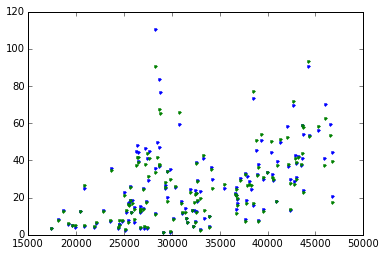

In [87]:
totald = popd + workd
nrides = databystation['nrides'].values
ndays = databystation['ndays'].values
#plt.plot(popd, nrides/ndays, '.')
#plt.plot(workd, nrides/ndays, '.')
plt.plot(totald, nrides/ndays, '.')
plt.plot(totald_allweek, nrides_allweek/ndays_allweek, '.')

In [ ]:
mbtaloc = '../Data/Boston/mbta.yaml'
mbtafile = open(mbtaloc, 'r')
mbta = yaml.load(configfile)
